In [2]:
import os
os.getcwd()


'C:\\Users\\allen'

In [1]:
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import streamlit as st
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

In [7]:
df_fake.info()
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
df_fake.isnull().sum()
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
# Add labels to distinguish between fake and true news
df_fake["label"] = 0    # 0 → Fake
df_true["label"] = 1    # 1 → True

In [10]:
# Display the first 5 rows of the fake news dataset
print("📄 FAKE NEWS DATASET PREVIEW:")
display(df_fake.head())

# Display the first 5 rows of the true news dataset
print("📰 TRUE NEWS DATASET PREVIEW:")
display(df_true.head())

📄 FAKE NEWS DATASET PREVIEW:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


📰 TRUE NEWS DATASET PREVIEW:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
#STATISTICAL SUMMARY(Count of articles)

In [11]:
print("Fake news:", len(df_fake))
print("True news:", len(df_true))

Fake news: 23481
True news: 21417


In [15]:
print(df_fake.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [16]:
# Create a new column showing how long each article is
df_fake['text_length'] = df_fake['text'].apply(len)
df_true['text_length'] = df_true['text'].apply(len)

In [17]:
print(df_fake.columns)

Index(['title', 'text', 'subject', 'date', 'label', 'text_length'], dtype='object')


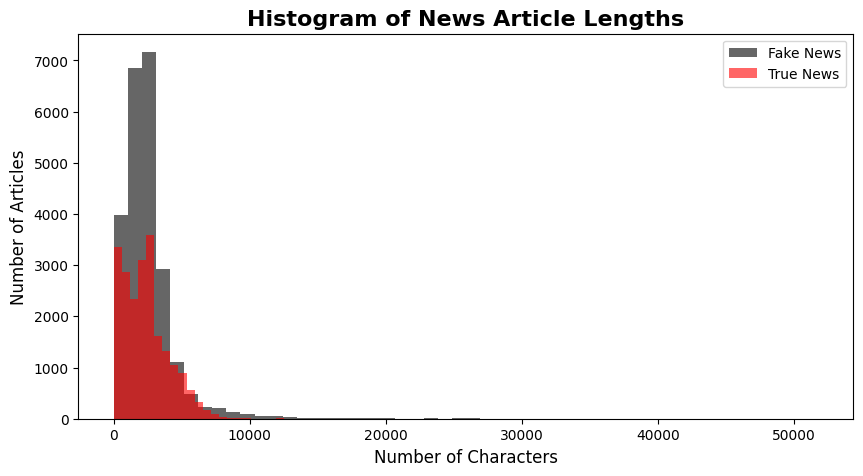

In [20]:
#HISTOGRAM 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df_fake['text_length'], bins=50, color='black', alpha=0.6, label='Fake News')
plt.hist(df_true['text_length'], bins=50, color='red', alpha=0.6, label='True News')

plt.title('Histogram of News Article Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.legend()
plt.show()


In [39]:
# single cell to install TextBlob into the kernel's interpreter and download corpora
import sys, subprocess, importlib

print("Kernel Python:", sys.executable)
print("Python version:", sys.version.splitlines()[0])

def pip_install(pack):
    print(f"Installing {pack} ...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", pack])

# Try import, otherwise install
try:
    import textblob
    from textblob import TextBlob
    print("TextBlob already installed.")
except Exception as e:
    print("TextBlob not found. Installing...")
    pip_install("textblob")
    import importlib
    importlib.invalidate_caches()
    from textblob import TextBlob
    print("TextBlob installed.")

# Download required corpora for TextBlob (this runs the bundled downloader)
try:
    print("Downloading TextBlob/NLTK corpora (if missing)...")
    subprocess.check_call([sys.executable, "-m", "textblob.download_corpora", "-q"])
    print("Corpora download finished.")
except subprocess.CalledProcessError:
    print("Corpora downloader failed — fallback to specific NLTK downloads...")
    import nltk
    nltk.download("punkt")
    nltk.download("wordnet")
    nltk.download("averaged_perceptron_tagger")
    nltk.download("stopwords")
    print("NLTK corpora (fallback) downloaded.")

# Quick test
tb = TextBlob("I love this library. It is great!")
print("TextBlob test polarity:", tb.sentiment.polarity, "subjectivity:", tb.sentiment.subjectivity)

print("\n✅ Install/download done. Please restart the Jupyter kernel (Kernel -> Restart Kernel) and then re-run your import cell:")
print("    from textblob import TextBlob")


Kernel Python: C:\Users\allen\AppData\Local\Programs\Python\Python313\python.exe
Python version: 3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
TextBlob not found. Installing...
Installing textblob ...
TextBlob installed.
Corpora download finished.
TextBlob test polarity: 0.75 subjectivity: 0.675

✅ Install/download done. Please restart the Jupyter kernel (Kernel -> Restart Kernel) and then re-run your import cell:
    from textblob import TextBlob


In [ ]:
#WORD FREQUENCY ANALYSIS 

In [23]:
from collections import Counter
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def get_most_common_words(text_series, n=20):
    words = ' '.join(text_series).lower()
    words = re.sub(r'[^a-z\s]', '', words)
    words = [w for w in words.split() if w not in stop_words]
    return Counter(words).most_common(n)

print("Fake news common words:", get_most_common_words(df_fake['text']))
print("True news common words:", get_most_common_words(df_true['text']))


ModuleNotFoundError: No module named 'nltk'

In [24]:
import sys
!{sys.executable} -m pip install nltk


  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- ------------------

In [22]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.8 MB/s  0:00:00
Using cached click-8.3.0-py3-none-any.whl (107 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/6 [regex]
   ---------------------------------------- 0/6 [regex]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [26]:
import nltk
nltk.download('stopwords')       # for removing common words
nltk.download('punkt')           # for splitting sentences/words (tokenization)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [28]:
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk

# Download stopwords (only need to run once)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_most_common_words(text_series, n=20):
    words = ' '.join(text_series).lower()
    words = re.sub(r'[^a-z\s]', '', words)  # Remove punctuation and numbers
    words = [w for w in words.split() if w not in stop_words]
    return Counter(words).most_common(n)

print("Fake news common words:", get_most_common_words(df_fake['text']))
print("True news common words:", get_most_common_words(df_true['text']))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fake news common words: [('trump', 73933), ('said', 31013), ('people', 25963), ('president', 25586), ('would', 23427), ('one', 22935), ('us', 22049), ('clinton', 18011), ('obama', 17813), ('like', 17621), ('donald', 17215), ('also', 15242), ('new', 14158), ('news', 14126), ('even', 13717), ('hillary', 13565), ('white', 12778), ('time', 12728), ('state', 12525), ('via', 11273)]
True news common words: [('said', 99039), ('trump', 42601), ('us', 41148), ('would', 31520), ('reuters', 28404), ('president', 25548), ('state', 18757), ('government', 17980), ('states', 17639), ('new', 16786), ('house', 16407), ('also', 15952), ('united', 15572), ('republican', 15292), ('people', 15117), ('told', 14244), ('could', 13705), ('one', 12678), ('last', 12614), ('washington', 12143)]


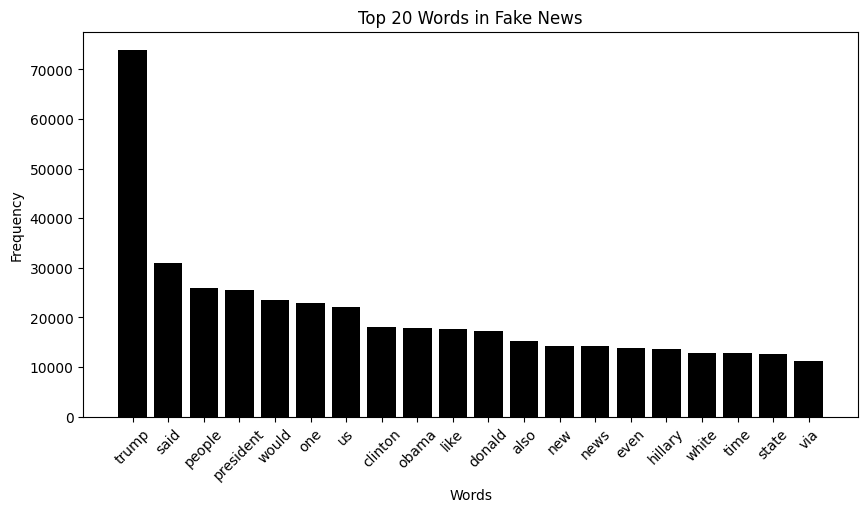

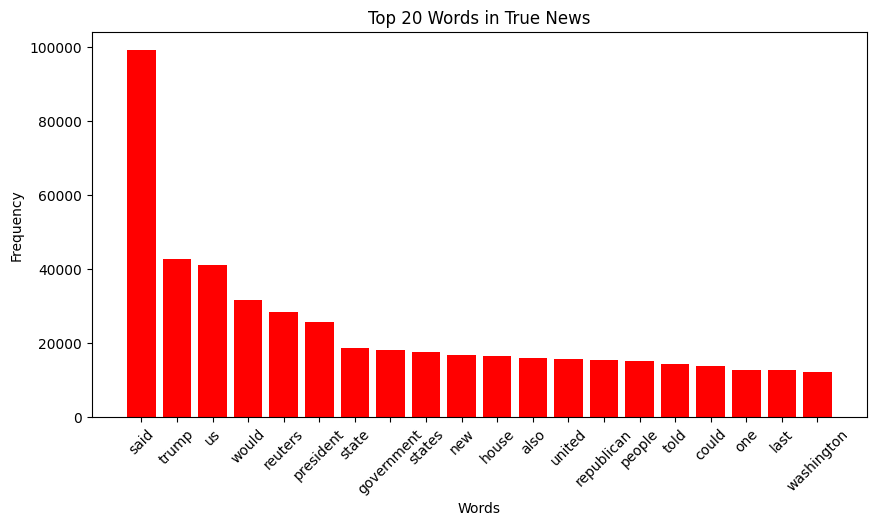

In [29]:
import matplotlib.pyplot as plt

# Get top 20 words
fake_top_words = get_most_common_words(df_fake['text'], n=20)
true_top_words = get_most_common_words(df_true['text'], n=20)

# Function to plot a simple bar chart
def plot_bar(word_freq, title, color):
    words = [w[0] for w in word_freq]
    counts = [w[1] for w in word_freq]
    
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot for Fake and True news
plot_bar(fake_top_words, 'Top 20 Words in Fake News', 'black')
plot_bar(true_top_words, 'Top 20 Words in True News', 'red')
plt.show()

In [30]:
#N-GRAM ANALYSIS

In [30]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.8 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/8.8 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.8 MB 3.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.8 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.8 MB 2.7 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.8 MB 2.7 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.8 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.8 MB 3.0 MB/s eta 0:00:02
   ------------------------ --------------- 5.5/8.8 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 6.0/8.8 MB 2.8 MB/s eta 0:00:01
   --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
import sys
!{sys.executable} -m pip install scikit-learn



  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.7 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.7 MB 963.2 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.7 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.7 MB 1.6 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.7 MB 1.9 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 1.9 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.7 MB 1.9 MB/s eta 0:00:03
   --------------------- ------

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_fake = vectorizer.fit_transform(df_fake['text'])
X_true = vectorizer.fit_transform(df_true['text'])

In [36]:
df_fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

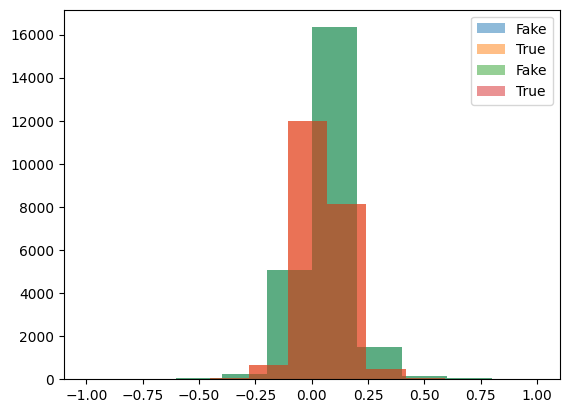

In [5]:
%matplotlib inline
from textblob import TextBlob
import matplotlib.pyplot as plt

df_fake['polarity'] = df_fake['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_true['polarity'] = df_true['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(df_fake['polarity'], alpha=0.5, label='Fake')
plt.hist(df_true['polarity'], alpha=0.5, label='True')
plt.legend()
plt.show()


In [1]:
!pip install streamlit 

Defaulting to user installation because normal site-packages is not writeable
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ------------------ --------------------- 0.5/1.1 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 3.0 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [876 lines of output]
  C:\Users\allen\AppData\Local\Temp\pip-build-env-6knn8hs2\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2026-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\allen\AppData\Local\Temp\pip-build

In [38]:
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel
!{sys.executable} -m pip install --prefer-binary pyarrow
!{sys.executable} -m pip install streamlit


  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/26.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/26.1 MB 1.6 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/26.1 MB 2.0 MB/s eta 0:00:13
   --- ------------------------------------ 2.1/26.1 MB 2.4 MB/s eta 0:00:11
   --- ------------------------------------ 2.4/26.1 MB 2.3 MB/s eta 0:00:11
   ---- ----------------------------------- 2.9/26.1 MB 2.3 MB/s eta 0:00:11
   ----- ---------------------------------- 3.4/26.1 MB 2.3 MB/s eta 0:00:10
   ----- ---------------------------------- 3.7/26.1 MB 2.2 MB/s eta 0:00:11
   ------ --------------------------------- 4.5/26.1 MB 2.3 MB/s eta 0:00:10
   ------- -------------------------------- 5.0/26.1 MB 2.4 MB/s eta 0:00:09
   -------- ----------------------